###0. Imports

Nessa seção iremos importar as bibliotecas necessárias

In [124]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score

###1. Carregar a base de dados
Abaixo iremos carregar a base de dados "Life Expectancy Data.csv" e exibir as 5 linhas iniciais do dataset.

O dataset está disponível em: https://drive.google.com/uc?export=download&id=1dHH13FgfqADSRgkNvkrf2Qn8o_Ph-_sn

Obs: iremos considerar a variável de saída: **Life expectancy**

In [125]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [126]:
df = pd.read_csv('/content/drive/MyDrive/Projeto-Final-CESAR/Life Expectancy Data.csv')

###2. Análise exploratória
Faça uma exploração dos dados do dataset, procurando verificar:

a) quais são as features, observando os tipos delas (numéricas ou categóricas) e se precisam de algum pré-processamento;


In [127]:
#Maior parte das variáveis são float;
#Tem variáveis com valores nulos;
#Duas variáveis categoricas - Country e Status;
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10  BMI                              2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [128]:
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [129]:
df.tail()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.0,68.0,31,27.1,42,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.0,7.0,998,26.7,41,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.0,73.0,304,26.3,40,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.0,76.0,529,25.9,39,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8
2937,Zimbabwe,2000,Developing,46.0,665.0,24,1.68,0.0,79.0,1483,25.5,39,78.0,7.10,78.0,43.5,547.358878,12222251.0,11.0,11.2,0.434,9.8


b) as informações estatísticas básicas das colunas do dataset;

In [130]:
df.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


c) se há dados faltantes e decida o que fazer: preencher com algum valor default, descartar algumas linhas ou descartar algumas as colunas;

Obs: Pode ser mais de uma operação. Você pode selecionar algumas colunas para descartar primeiro e depois as linhas com valores faltantes, por exemplo.


In [131]:
# Soma dos dados faltantes por coluna
df.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
BMI                                 34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
HIV/AIDS                             0
GDP                                448
Population                         652
thinness 1-19 years                 34
thinness 5-9 years                  34
Income composition of resources    167
Schooling                          163
dtype: int64

In [132]:
#Criando uma variável somente com as linhas que possuem valor da coluna Alcohol nulo
alcool = df.loc[df['Alcohol'].isnull() == True]
alcool

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
32,Algeria,2015,Developing,75.6,19.0,21,NaN,0.0,95.0,63,59.5,24,95.0,NaN,95.0,0.1,4132.762920,39871528.0,6.0,5.8,0.743,14.4
48,Angola,2015,Developing,52.4,335.0,66,NaN,0.0,64.0,118,23.3,98,7.0,NaN,64.0,1.9,3695.793748,2785935.0,8.3,8.2,0.531,11.4
64,Antigua and Barbuda,2015,Developing,76.4,13.0,0,NaN,0.0,99.0,0,47.7,0,86.0,NaN,99.0,0.2,13566.954100,NaN,3.3,3.3,0.784,13.9
80,Argentina,2015,Developing,76.3,116.0,8,NaN,0.0,94.0,0,62.8,9,93.0,NaN,94.0,0.1,13467.123600,43417765.0,1.0,0.9,0.826,17.3
96,Armenia,2015,Developing,74.8,118.0,1,NaN,0.0,94.0,33,54.9,1,96.0,NaN,94.0,0.1,369.654776,291695.0,2.1,2.2,0.741,12.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2858,Venezuela (Bolivarian Republic of),2015,Developing,74.1,157.0,9,NaN,0.0,87.0,0,62.1,10,87.0,NaN,87.0,0.1,NaN,NaN,1.6,1.5,0.769,14.3
2874,Viet Nam,2015,Developing,76.0,127.0,28,NaN,0.0,97.0,256,17.5,35,97.0,NaN,97.0,0.1,NaN,NaN,14.2,14.5,0.678,12.6
2890,Yemen,2015,Developing,65.7,224.0,37,NaN,0.0,69.0,468,41.3,47,63.0,NaN,69.0,0.1,NaN,NaN,13.6,13.4,0.499,9.0
2906,Zambia,2015,Developing,61.8,33.0,27,NaN,0.0,9.0,9,23.4,40,9.0,NaN,9.0,4.1,1313.889646,161587.0,6.3,6.1,0.576,12.5


In [133]:
#South Sudan tem muitos valores nulos
alcool['Country'].value_counts()

South Sudan    16
Montenegro      2
Algeria         1
Paraguay        1
Niger           1
               ..
Ghana           1
Greece          1
Grenada         1
Guatemala       1
Zimbabwe        1
Name: Country, Length: 178, dtype: int64

In [134]:
South_Sudan = df.loc[df['Country'] == 'South Sudan']
South_Sudan.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
2409,South Sudan,2015,Developing,57.3,332.0,26,NaN,0.000000,31.0,878,NaN,39,41.0,NaN,31.0,3.4,758.725782,11882136.0,NaN,NaN,0.421,4.9
2410,South Sudan,2014,Developing,56.6,343.0,26,NaN,46.074469,NaN,441,NaN,39,44.0,2.74,39.0,3.5,1151.861715,1153971.0,NaN,NaN,0.421,4.9
2411,South Sudan,2013,Developing,56.4,345.0,26,NaN,47.444530,NaN,525,NaN,40,5.0,2.62,45.0,3.6,1186.113250,1117749.0,NaN,NaN,0.417,4.9
2412,South Sudan,2012,Developing,56.0,347.0,26,NaN,38.338232,NaN,1952,NaN,40,64.0,2.77,59.0,3.8,958.455810,1818258.0,NaN,NaN,0.419,4.9
2413,South Sudan,2011,Developing,55.4,355.0,27,NaN,0.000000,NaN,1256,NaN,41,66.0,NaN,61.0,3.9,176.971300,1448857.0,NaN,NaN,0.429,4.9


In [135]:
# Eu vou atribuir os mesmos valores de alcool do Sudan para o South Sudan com forme o ano
df.loc[df['Country'] == 'Sudan']

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
2457,Sudan,2015,Developing,64.1,225.0,58,NaN,0.000000,93.0,3585,NaN,85,93.0,NaN,93.0,0.3,2513.884661,3864783.0,NaN,NaN,0.488,7.2
2458,Sudan,2014,Developing,63.8,229.0,59,0.01,253.608651,94.0,676,NaN,86,94.0,8.43,94.0,0.3,2176.898290,37737913.0,NaN,NaN,0.485,7.2
2459,Sudan,2013,Developing,63.5,232.0,60,0.01,227.835321,93.0,2813,NaN,88,93.0,8.42,93.0,0.3,1955.667990,36849918.0,NaN,NaN,0.478,7.0
2460,Sudan,2012,Developing,63.2,235.0,61,0.01,220.522192,92.0,8523,NaN,89,92.0,8.20,92.0,0.3,1892.894352,3599192.0,NaN,NaN,0.468,6.8
2461,Sudan,2011,Developing,62.7,241.0,61,2.12,196.689215,93.0,5616,NaN,91,93.0,8.30,93.0,0.3,1666.857757,35167314.0,NaN,NaN,0.463,7.0
2462,Sudan,2010,Developing,62.5,243.0,62,1.77,172.009788,75.0,680,NaN,92,9.0,7.97,9.0,0.3,1476.478870,34385963.0,NaN,NaN,0.461,7.0
2463,Sudan,2009,Developing,62.0,248.0,63,1.99,17.053693,72.0,68,NaN,94,81.0,8.40,81.0,0.3,1226.884381,3365619.0,NaN,NaN,0.456,6.8
2464,Sudan,2008,Developing,61.8,251.0,64,2.01,128.636271,78.0,129,NaN,95,85.0,8.17,86.0,0.3,1291.528826,32955496.0,NaN,NaN,0.444,6.3
2465,Sudan,2007,Developing,61.4,254.0,65,2.01,86.131669,78.0,327,NaN,97,84.0,4.72,84.0,0.3,1115.695200,32282526.0,NaN,NaN,0.440,6.4
2466,Sudan,2006,Developing,61.0,26.0,66,1.90,60.336857,6.0,228,NaN,99,77.0,3.93,78.0,0.2,893.879364,316764.0,NaN,NaN,0.430,6.2


In [136]:
# Valores de Alcohol do país sudan
# A lista começa pelo valor de alcohol do ano de 2014 e decresce até 2000
values_alcohol = [0.01, 0.01, 0.01, 2.12, 1.77, 1.99, 2.01, 2.01, 1.9, 1.55, 1.59, 1.74, 1.59, 1.81, 1.76]

In [137]:
faltantes_South_Sudan = South_Sudan.loc[:,['Year','Alcohol']]
faltantes_South_Sudan

,Year,Alcohol
2409,2015,NaN
2410,2014,NaN
2411,2013,NaN
2412,2012,NaN
2413,2011,NaN
2414,2010,NaN
2415,2009,NaN
2416,2008,NaN
2417,2007,NaN
2418,2006,NaN


In [138]:
# index das linhas que eu desejo substituir o valor
index_South_Sudan = faltantes_South_Sudan.index

In [139]:
lista_index_South_Sudan = list(index_South_Sudan)
#Removendo o index do ano de 2015 da lista porque eu não tenho valor para colocar para esse ano
lista_index_South_Sudan.pop(0)

2409

In [140]:
lista_index_South_Sudan

[2410,
 2411,
 2412,
 2413,
 2414,
 2415,
 2416,
 2417,
 2418,
 2419,
 2420,
 2421,
 2422,
 2423,
 2424]

In [141]:
# fazendo uma cópia do df
df_copy = df.copy()

In [142]:
#Substiuindo os valores específicos
for i in range(15):
  df_copy.loc[df_copy.index == lista_index_South_Sudan[i], 'Alcohol'] = values_alcohol[i]

In [143]:
# conferindo um dos valores
df_copy.loc[df_copy.index == 2424]

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
2424,South Sudan,2000,Developing,48.9,38.0,31,1.76,0.0,NaN,0,NaN,50,NaN,NaN,NaN,2.7,NaN,67656.0,NaN,NaN,0.0,0.0


In [144]:
df_copy.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            179
percentage expenditure               0
Hepatitis B                        553
Measles                              0
BMI                                 34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
HIV/AIDS                             0
GDP                                448
Population                         652
thinness 1-19 years                 34
thinness 5-9 years                  34
Income composition of resources    167
Schooling                          163
dtype: int64

In [145]:
# Eliminar essas valores nulos pq são os menores valores
df_copy.dropna(subset=['Life expectancy', 'infant deaths', 'Polio', 'Diphtheria', 'thinness 1-19 years', 'thinness 5-9 years'], inplace=True)

In [146]:
df_copy.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                      0
Adult Mortality                      0
infant deaths                        0
Alcohol                            175
percentage expenditure               0
Hepatitis B                        525
Measles                              0
BMI                                  0
under-five deaths                    0
Polio                                0
Total expenditure                  212
Diphtheria                           0
HIV/AIDS                             0
GDP                                435
Population                         644
thinness 1-19 years                  0
thinness 5-9 years                   0
Income composition of resources    160
Schooling                          160
dtype: int64

In [147]:
df_copy.shape

(2888, 22)

In [148]:
#Substituindo o resto dos valores faltantes pela moda de cada coluna

In [149]:
df_copy['Alcohol'].median()

3.81

In [150]:
df_copy["Alcohol"].fillna(3.81, inplace=True)

In [151]:
df_copy['Hepatitis B'].mode()

0    99.0
dtype: float64

In [152]:
df_copy['Hepatitis B'].fillna(99.0, inplace=True)

In [153]:
df_copy['Total expenditure'].mode()

0    4.6
dtype: float64

In [154]:
df_copy['Total expenditure'].fillna(4.6, inplace=True)

In [155]:
#Substituindo pela mediana da coluna
df_copy['Income composition of resources'].median()

0.6795

In [156]:
df_copy['Income composition of resources'].fillna(0.6795, inplace=True)

In [157]:
df_copy['Schooling'].mode()

0    12.9
dtype: float64

In [158]:
df_copy['Schooling'].fillna(12.9, inplace=True)

In [159]:
df_copy.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                      0
Adult Mortality                      0
infant deaths                        0
Alcohol                              0
percentage expenditure               0
Hepatitis B                          0
Measles                              0
BMI                                  0
under-five deaths                    0
Polio                                0
Total expenditure                    0
Diphtheria                           0
HIV/AIDS                             0
GDP                                435
Population                         644
thinness 1-19 years                  0
thinness 5-9 years                   0
Income composition of resources      0
Schooling                            0
dtype: int64

In [160]:
df_copy.dropna(inplace=True)

In [161]:
df_copy.isnull().sum()

Country                            0
Year                               0
Status                             0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
BMI                                0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
HIV/AIDS                           0
GDP                                0
Population                         0
thinness 1-19 years                0
thinness 5-9 years                 0
Income composition of resources    0
Schooling                          0
dtype: int64

In [162]:
df_copy.shape

(2230, 22)

In [163]:
#Tratando a variável categorica
df_copy['Status'].value_counts()

Developing    1814
Developed      416
Name: Status, dtype: int64

In [164]:
#Aplicando a função get_dummies
df_copy = pd.get_dummies(df_copy, columns = ['Status'])

In [165]:
df_copy.head()

,Country,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Status_Developed,Status_Developing
0,Afghanistan,2015,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1,0,1
1,Afghanistan,2014,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0,0,1
2,Afghanistan,2013,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9,0,1
3,Afghanistan,2012,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8,0,1
4,Afghanistan,2011,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5,0,1


d) a matriz de correlação das entradas com a saída;

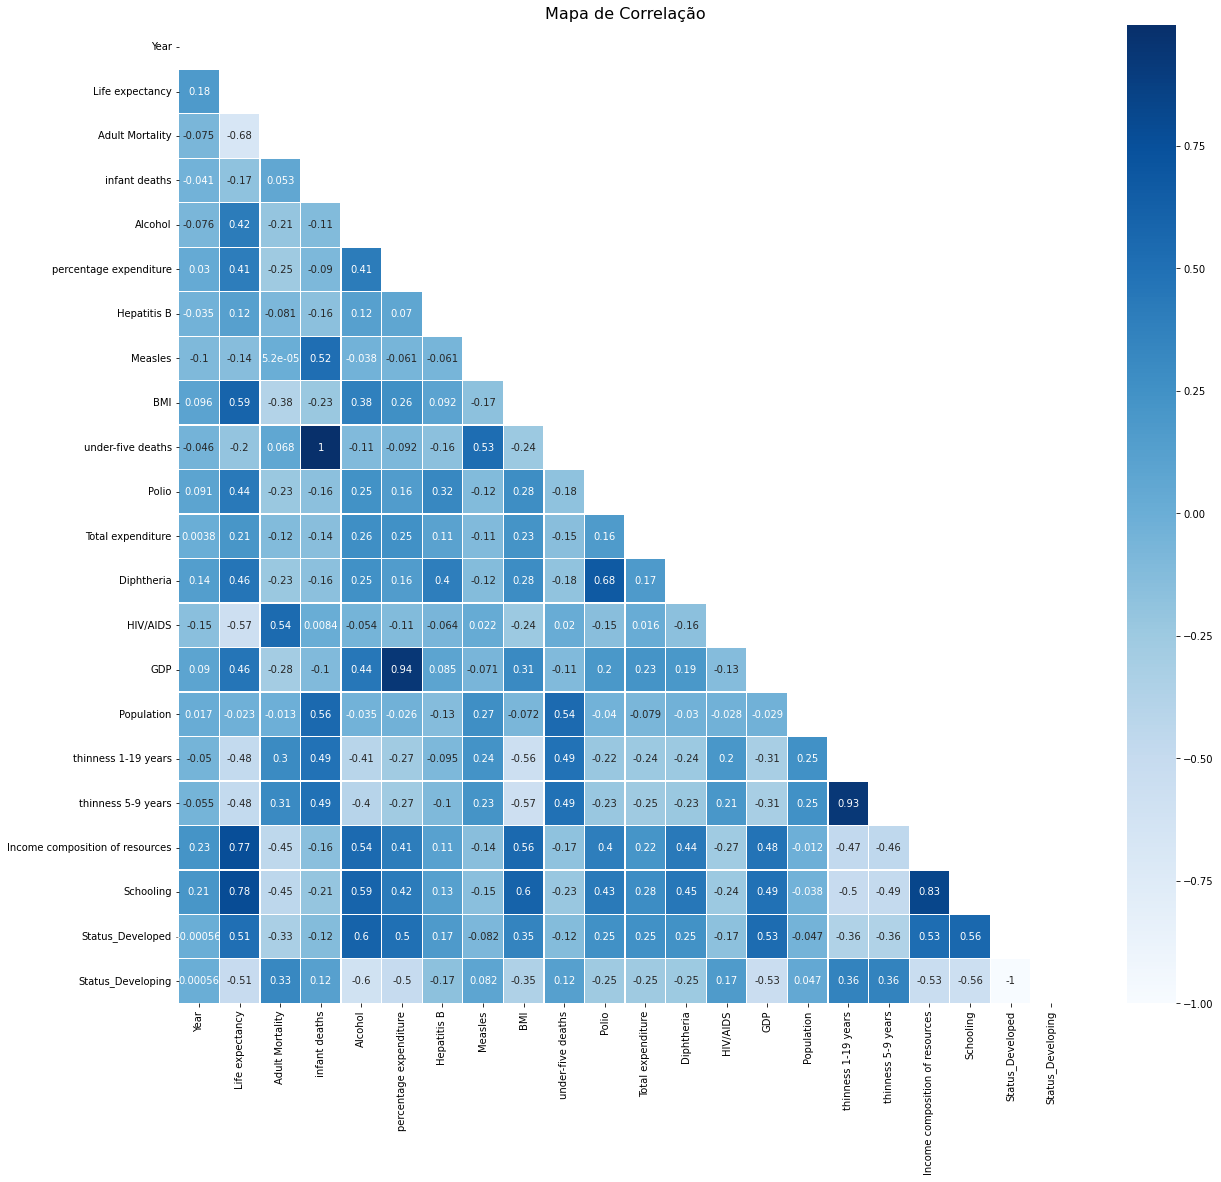

In [166]:
corr = df_copy.corr()
plt.figure(figsize=(20, 18))
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, annot=True, cmap="Blues", mask=mask, linewidth=0.3)
plt.title('Mapa de Correlação', fontsize=16)
plt.show()

e) quais as features que mais possuem correlação (negativa ou positivamente) com a saída?

In [167]:
# As variáveis Income composition of resources e Schooling são as que possuem mais correlação positiva com a saída.
# As variáveis Adult Mortality e HIV/AIDS são as com maior correlação negativa com a saída.

f) com base na matriz de correlação, encontre duas features que são redundantes entre si.

*Obs:* uma feature redundante com outra é uma feature cuja correlação com outra feature é próxima de 1 ou de -1;

In [168]:
# As fetuares under-five deaths e infant deaths são redunadantes pois tem correlação igual a 1.
# As features GDP e percentage expenditure eu também diria que são redundantes com a correlação de 0.94.
# E as features thinness 1-19 years e thinness 5-9 years também são redundantes com coleção de 0.93.

g) com base na correlação dessas duas features redundantes com a variável de saída, qual das duas você removeria do seu dataset, caso lhe fosse pedido para remover a redundância?

In [169]:
# Entre as features under-five deaths e infant deaths eu removeria a under-fiver deaths, porque para mim a featurs infant deaths já cobre os menores de 5 anos.
# Além de que a feature escolhida tem um correlação um pouco maior com o alvo.
# Entre as features GDP e percentage expenditure eu removeria a feature percentage expenditure, porque eu acho que o GDP já cobre as despesas percentuais e tem maior correlação com a feature alvo.
# Entre as features thinness 1-19 years e thinness 5-9 years eu removeria a primeira porque ela já compreende todo o espaço da segunda feature.

h) com base nas correlações das features com a saída, você acredita que esse dataset oferece condições de predizer a variável de saída?

In [170]:
#Sim

###3. Divisão de treinamento e teste
Divida o dataset em conjunto de treinamento (70%) e de teste (30%);

In [171]:
df_copy.columns

Index(['Country', 'Year', 'Life expectancy', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles', 'BMI', 'under-five deaths', 'Polio', 'Total expenditure',
       'Diphtheria', 'HIV/AIDS', 'GDP', 'Population', 'thinness 1-19 years',
       'thinness 5-9 years', 'Income composition of resources', 'Schooling',
       'Status_Developed', 'Status_Developing'],
      dtype='object')

In [172]:
# Definição das colunas que serão features
features = ['Adult Mortality', 'Alcohol', 'BMI' ,'Polio', 'Diphtheria', 'HIV/AIDS', 'GDP', 'thinness 1-19 years','Income composition of resources', 'Schooling','Status_Developed', 'Status_Developing']

# Definição da variável-alvo
target = ['Life expectancy']

x = df_copy[features]
y = df_copy[target]

# Divisão do conjunto em treinamento e validação
tamanho_val = 0.3
X_train, X_val, y_train, y_val = train_test_split(x, y, test_size=tamanho_val, shuffle=True, random_state=0)

###4. Tratamento dos dados
Aplique a padronização, de forma separada, nos conjuntos de treinamento e de teste;

In [173]:
fi = StandardScaler()
X = fi.fit_transform(X_train[features])
X_test = fi.transform(X_val[features])

###5. Execute a Regressão Linear

Use a Regressão Linear para predizer a expectativa de vida (variável de saída **Life expectancy**)

In [174]:
model = LinearRegression()
model.fit(X_train, y_train)

# Predição no conjunto de validação
preditions_val = model.predict(X_val)

###6. Avaliação da Regressão Linear
Crie gráficos de linha para visualizar a performance do modelo.

#### 6.1 Avaliação visual
Primeiro, faça um gráfico mostrando o valor predito (dados de teste) sobre o valor real com todos os pontos.

In [175]:
y_val.head()

,Life expectancy
151,73.0
862,58.8
39,74.1
1727,64.0
465,68.3


In [176]:
#Tem que converter o y_val de um DataFrame para um array numpy

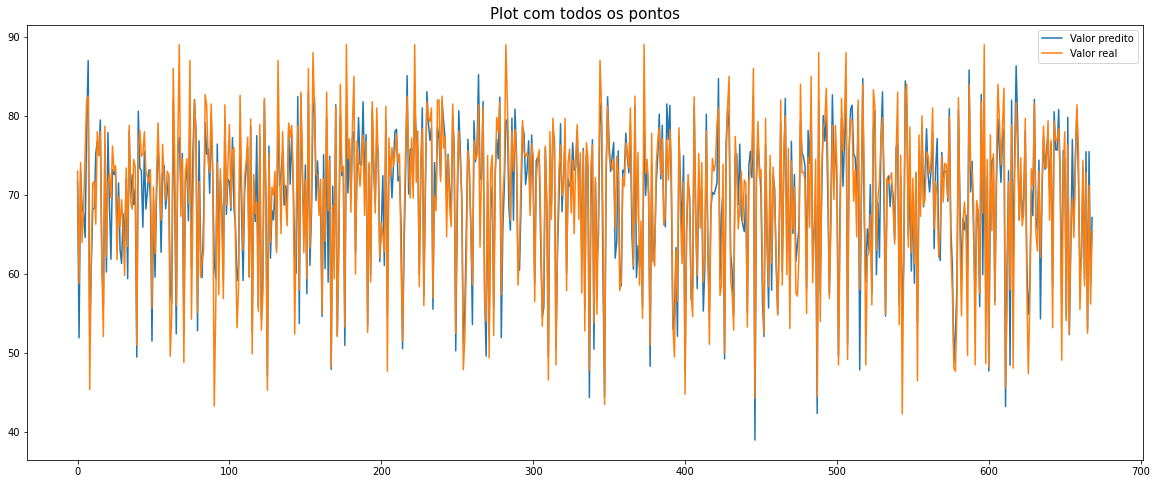

In [177]:
plt.figure(figsize=(20,8))
plt.plot(preditions_val, label='Valor predito')
plt.plot(y_val.to_numpy(), label='Valor real')
plt.title('Plot com todos os pontos', fontsize=15)
plt.legend()
plt.show()

Para facilitar a visualização, faça um gráfico apenas dos 100 primeiros pontos.

In [178]:
preditions_val_100 = preditions_val[:100]
y_val_100 = y_val.to_numpy()[:100]
print('Tamanho preditions_val_100:',len(preditions_val_100))
print('Tamanho y_val_100:',len(y_val_100))

Tamanho preditions_val_100: 100
Tamanho y_val_100: 100


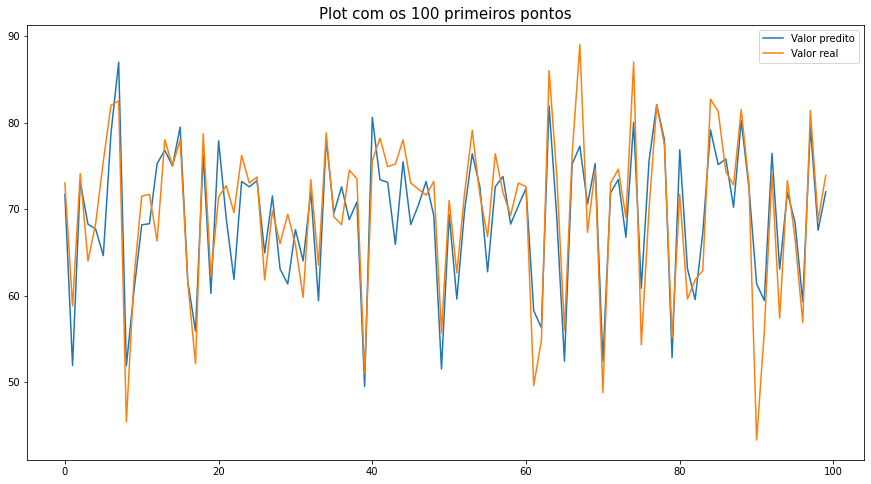

In [179]:
plt.figure(figsize=(15,8))
plt.plot(preditions_val_100, label='Valor predito')
plt.plot(y_val_100, label='Valor real')
plt.title('Plot com os 100 primeiros pontos', fontsize=15)
plt.legend()
plt.show()

Agora, faça um gráfico exibindo o erro entre os pontos (valor real - valor predito).

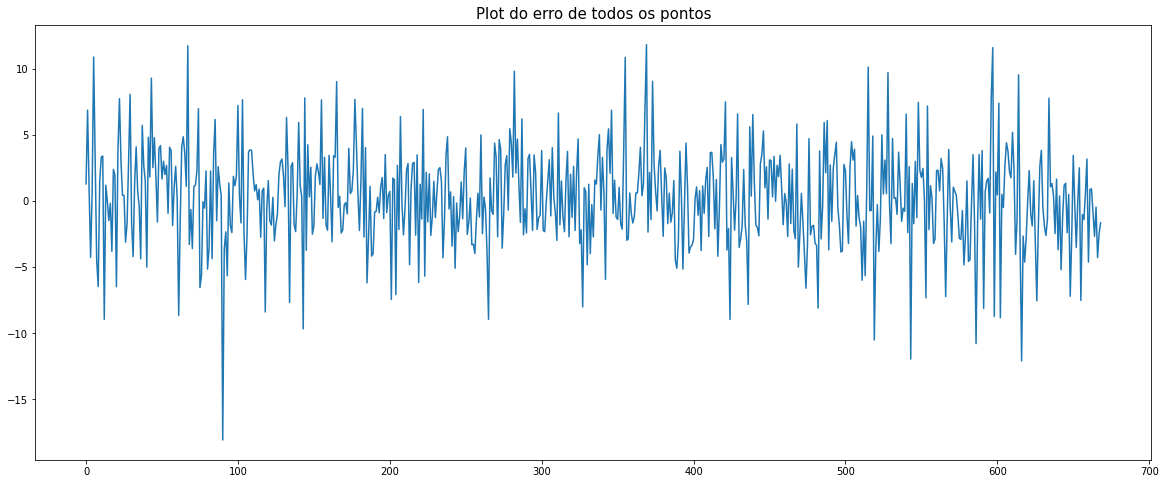

In [180]:
erro = y_val.to_numpy() - preditions_val
plt.figure(figsize=(20,8))
plt.plot(erro)
plt.title('Plot do erro de todos os pontos', fontsize=15)
plt.show()

Com base nas visualizações, você considera que o modelo conseguiu predizer bem a saída?

In [181]:
# Em geral eu acho que o modelo conseguir ter uma boa predição, porém em alguns pontos o modelo teve um erro muito grande.

####6.2 Avaliação por métricas
Avalie o modelo quantitativamente utilizando as métricas aprendidas (RMSE e R2) e verifique se sua impressão visual se confirma.

In [182]:
# Avaliação dos resultados
rmse = mean_squared_error(y_val, preditions_val, squared=False)
score = r2_score(y_val, preditions_val)

# The mean squared error
print("RMSE: {0}".format(rmse))
# Variance score
print('Variance score: %.2f' % score)

RMSE: 3.728204922427317
Variance score: 0.85


In [183]:
# Minha impressão visual se confirmou o modelo obteve uma variance score de 0.85 sendo que quanto mais perto de 1 melhor.
# E um RMSE de 3.72, quanto menor o RMSE melhor vai ser.
# O erro ainda está um pouco alto

####6.3 Validação cruzada
Utilize validação cruzada (cross validation score) usando a métrica R2 com 10 folds (parametro cv=10) para avaliar o modelo.

In [184]:
scores = cross_val_score(model, x, y, cv=10, scoring='r2')
scores

array([0.83389034, 0.81698708, 0.78313394, 0.83390832, 0.81436627,
       0.85049778, 0.84677549, 0.78819337, 0.7933826 , 0.79398768])

In [185]:
#Média
scores.mean()

0.8155122870765814